# **Informe de Desempeño de Tiendas Alura Store**
**Introducción:**
El Sr. Juan necesita vender una de las cuatro tiendas de Alura Store para financiar un nuevo emprendimiento. Este informe compara ventas, rendimiento y reseñas para identificar la tienda menos eficiente basado en datos.

###**Analisis:**
- **Ingresos:** Los ingresos están distribuidos de forma relativamente equilibrada entre las cuatro tiendas, lo que indica estabilidad del negocio y baja dependencia de una sola unidad. Sin embargo, la Tienda 4 presenta el menor aporte al ingreso total
- **Ventas:** Las ventas de la cadena se concentran principalmente en categorías de alta rotación (especialmente muebles y electrónicos), mientras que un grupo de categorías presenta menor movimiento, lo que puede generar inventario más lento y requerir estrategias específicas.
- **Calificación:** Las calificaciones promedio se mantienen altas y muy similares entre las cuatro tiendas, lo que indica una experiencia del cliente consistente y sin señales de una unidad con problemas graves de reputación.

- **Productos mas y menos vendidos:** El comportamiento de ventas por producto muestra una diferencia moderada entre los más vendidos y los menos vendidos, lo que indica una demanda relativamente estable sin depender de un solo artículo.

- **Costos de envio**: El costo de envío promedio se mantiene prácticamente constante entre las cuatro tiendas, lo que evidencia una operación logística homogénea y sin desventajas marcadas por unidad.

### **Conclución:**
Dado que los ingresos están relativamente equilibrados, pero la Tienda 4 aporta el menor ingreso total, y considerando que no presenta desventajas visibles en satisfacción del cliente ni en costos de envío, se recomienda priorizar la venta de la Tienda 4.


### Importación de datos



In [80]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingreso total por cada tienda

el ingreso de la tienda #1 es de $1150880400.0
el ingreso de la tienda #2 es de $1116343500.0
el ingreso de la tienda #3 es de $1098019600.0
el ingreso de la tienda #4 es de $1038375700.0
el ingreso de las tiendas es de $4403619200.0


Text(0.5, 1.0, 'Distribución del ingreso por tienda')

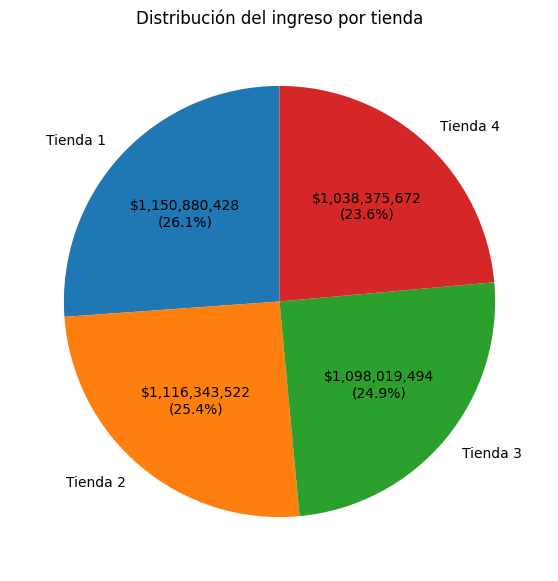

In [151]:

tiendas = [tienda , tienda2 , tienda3,  tienda4]
ingreso = [t['Precio'].sum() for t in tiendas]
valor = 0
total = 0
for num_tienda, valor in enumerate(ingreso, start=1):
  total = total + valor
  print(f'el ingreso de la tienda #{num_tienda} es de ${valor}')
print(f'el ingreso de las tiendas es de ${total}')

grafica_ingreso = pd.Series(ingreso, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
ax1 = grafica_ingreso.plot(kind = "pie",figsize = (7,7), startangle = 90 , autopct=lambda pct: f"${pct*total/100:,.0f}\n({pct:.1f}%)")
ax1.set_title("Distribución del ingreso por tienda")


# 2. Ventas por categoría

Las categorias de la tienda #1 son: 
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Las categorias de la tienda #2 son: 
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Las categorias de la tienda #3 son: 
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype:

Text(0, 0.5, 'Cantidad de ventas')

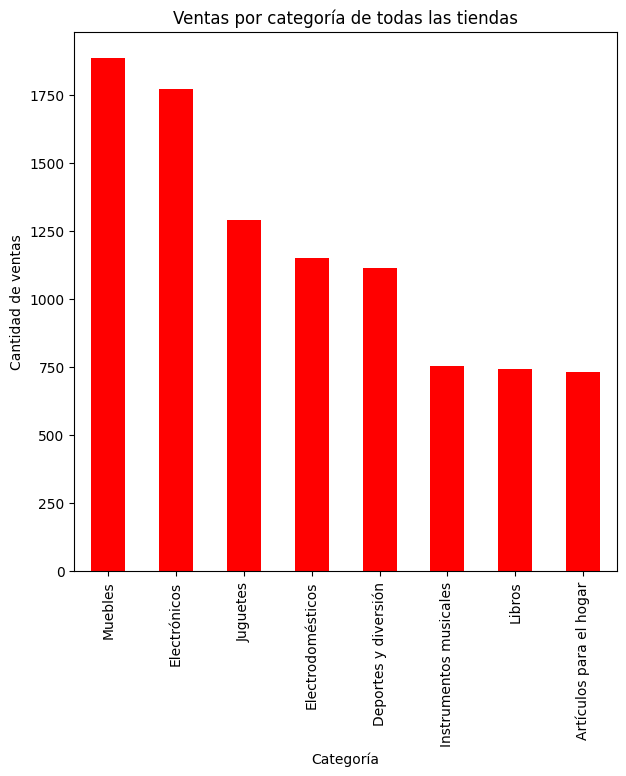

In [165]:
categoria = [t['Categoría del Producto'].value_counts() for t in tiendas]

for num_tienda, valor in enumerate(categoria, start=1):
  print(f'Las categorias de la tienda #{num_tienda} son: \n {valor}\n')

total_categoria =pd.Series(dtype=int)

for i in categoria:
  total_categoria = total_categoria.add(i, fill_value=0)

total_categoria = total_categoria.astype(int)

print(f'Las categorias de toda la tienda es: \n')

for nombre, cantidad in total_categoria.items():
  print(f'{nombre} ---> {cantidad}')

grafica_categoria = total_categoria.sort_values(ascending=False)

ax2 = grafica_categoria.plot(kind = "bar",figsize = (7,7), title = "Ventas por categoría de todas las tiendas", color = "red")
ax2.set_xlabel("Categoría")
ax2.set_ylabel("Cantidad de ventas")

# 3. Calificación promedio de la tienda


La calificacion promedio de la tienda #1 es de 3.976685036032217
La calificacion promedio de la tienda #2 es de 4.037303942348453
La calificacion promedio de la tienda #3 es de 4.048325561678677
La calificacion promedio de la tienda #4 es de 3.9957591178965224


Text(0.5, 0, 'Calificacion')

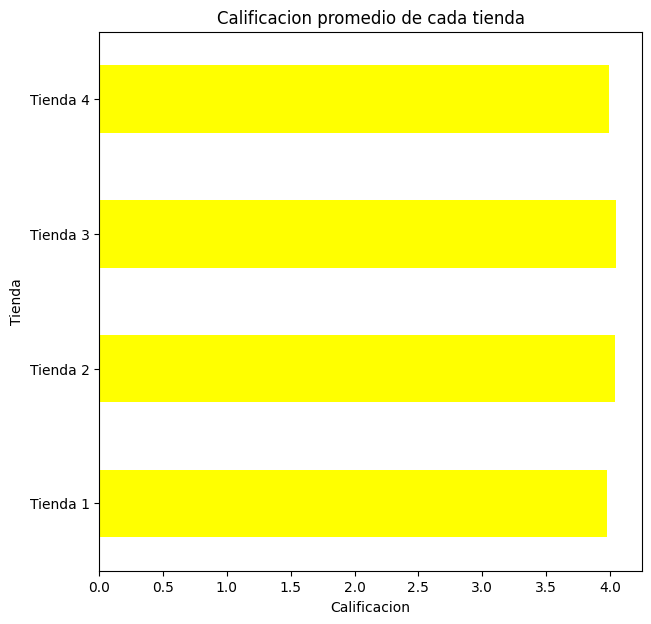

In [163]:
calificacion = [t['Calificación'].mean() for t in tiendas]

for num_tienda , valor in enumerate(calificacion, start=1):
  print(f'La calificacion promedio de la tienda #{num_tienda} es de {valor}')

calificacion_s = pd.Series(calificacion, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

ax3 = calificacion_s.plot(kind = "barh",figsize = (7,7), title = "Calificacion promedio de cada tienda", color = "yellow")
ax3.set_ylabel("Tienda")
ax3.set_xlabel("Calificacion")

# 4. Productos más y menos vendidos

In [126]:
producto = [t["Producto"].value_counts() for t in tiendas]

total_producto =pd.Series(dtype=int)

for i in producto:
  total_producto = total_producto.add(i, fill_value=0).sort_values(ascending=False)

total_producto = total_producto.astype(int)

print(f'\ntop 10 productos mas vendidos\n')
print(total_producto.sort_values(ascending=False).head(10))
print(f'\ntop 10 productos menos vendidos\n')
print(total_producto.sort_values(ascending=True).head(10))




top 10 productos mas vendidos

Producto
Mesa de noche                210
Microondas                   206
Carrito de control remoto    206
Batería                      203
Cama king                    201
Modelado predictivo          200
Secadora de ropa             200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
dtype: int64

top 10 productos menos vendidos

Producto
Celular ABXY                   157
Auriculares con micrófono      158
Mochila                        163
Guitarra eléctrica             165
Ciencia de datos con Python    166
Asistente virtual              167
Sillón                         168
Set de vasos                   169
Smartwatch                     172
Olla de presión                172
dtype: int64


# 5. Envío promedio por tienda

El promedio de costo de envio de la tienda #1 es de $26018.60958033065
El promedio de costo de envio de la tienda #2 es de $25216.235693090293
El promedio de costo de envio de la tienda #3 es de $24805.680373039424
El promedio de costo de envio de la tienda #4 es de $23459.457167090754


Text(0.5, 0, 'Tienda')

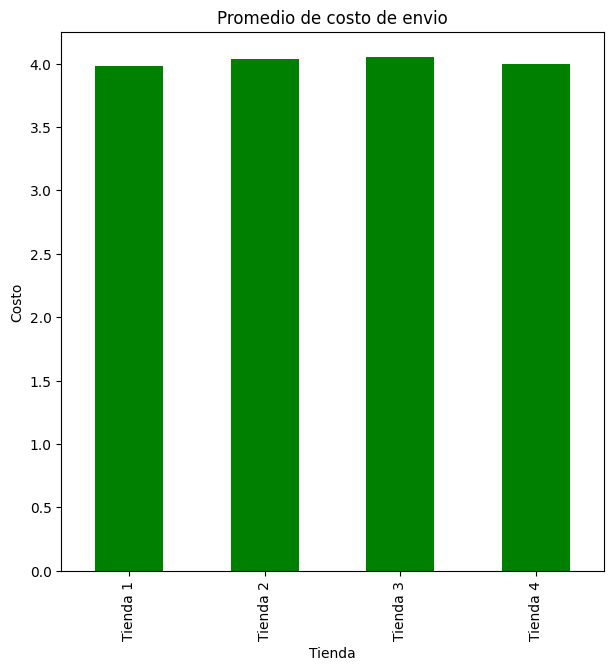

In [164]:
envio = [t['Costo de envío'].mean() for t in tiendas]

for num_tienda , valor in enumerate(envio, start=1):
  print(f'El promedio de costo de envio de la tienda #{num_tienda} es de ${valor}')
envio_s = pd.Series(envio, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

ax5 = calificacion_s.plot(kind = "bar",figsize = (7,7), title = "Promedio de costo de envio", color = "green")
ax5.set_ylabel("Costo")
ax5.set_xlabel("Tienda")